In [ ]:
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings("ignore")

EDA on rating column for TRAINING DATA

In [ ]:
d1 = pd.read_csv("/Redmi Note 11.csv")

In [ ]:
d2=pd.read_csv("/Samsung Galaxy M32.csv")

In [ ]:
df= pd.concat([d1,d2], axis = 0)

In [ ]:
del df['title']

In [ ]:
df.head()

,product,rating,body
0,"Redmi Note 11 (Horizon Blue, 6GB RAM, 128GB St...",2.0,I had redmi 6 Pro and exchanged it for Redmi 1...
1,"Redmi Note 11 (Horizon Blue, 6GB RAM, 128GB St...",5.0,For 12500/- price it's a good picScreen Amoled...
2,"Redmi Note 11 (Horizon Blue, 6GB RAM, 128GB St...",4.0,"Pros- Amoled Screen, Battery easily lasts a da..."
3,"Redmi Note 11 (Horizon Blue, 6GB RAM, 128GB St...",4.0,"Redmi Note 11 is great piece, but automatic ca..."
4,"Redmi Note 11 (Horizon Blue, 6GB RAM, 128GB St...",5.0,The media could not be loaded.\n ...


In [ ]:
df.shape

(4783, 3)

CHECKING FOR NULL VALUES

In [ ]:
df.isnull().sum()

product      0
rating       0
body       160
dtype: int64

In [ ]:
df.dropna()

,product,rating,body
0,"Redmi Note 11 (Horizon Blue, 6GB RAM, 128GB St...",2.0,I had redmi 6 Pro and exchanged it for Redmi 1...
1,"Redmi Note 11 (Horizon Blue, 6GB RAM, 128GB St...",5.0,For 12500/- price it's a good picScreen Amoled...
2,"Redmi Note 11 (Horizon Blue, 6GB RAM, 128GB St...",4.0,"Pros- Amoled Screen, Battery easily lasts a da..."
3,"Redmi Note 11 (Horizon Blue, 6GB RAM, 128GB St...",4.0,"Redmi Note 11 is great piece, but automatic ca..."
4,"Redmi Note 11 (Horizon Blue, 6GB RAM, 128GB St...",5.0,The media could not be loaded.\n ...
...,...,...,...
3343,"Samsung Galaxy M32 5G (Sky Blue, 6GB RAM, 128G...",3.0,It doesn't worth the money
3344,"Samsung Galaxy M32 5G (Sky Blue, 6GB RAM, 128G...",1.0,It's a defective set for following reasons1. C...
3345,"Samsung Galaxy M32 5G (Sky Blue, 6GB RAM, 128G...",2.0,Touch properly not working after 2 month
3346,"Samsung Galaxy M32 5G (Sky Blue, 6GB RAM, 128G...",1.0,"it's been 10 days, I have bought Samsung m32 5..."


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0.5, 1.0, 'Histogram for the ratings of Redmi Note 11')]

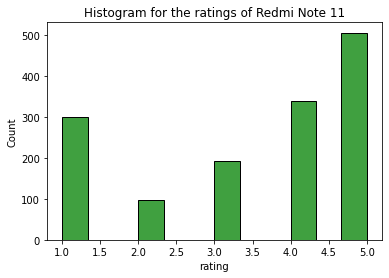

In [ ]:
sns.histplot(data=d1, x="rating",color='green').set(title='Histogram for the ratings of Redmi Note 11')

[Text(0.5, 1.0, 'Histogram for the ratings of Samsung Galaxy M32')]

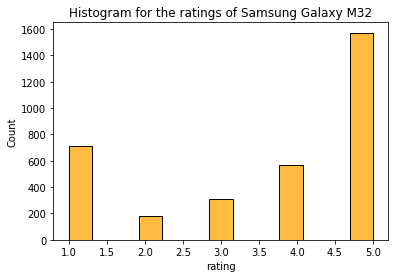

In [ ]:
sns.histplot(data=d2, x="rating",color='orange').set(title='Histogram for the ratings of Samsung Galaxy M32')

Number of rows per rating:
5.0    2079
1.0    1011
4.0     908
3.0     504
2.0     281
Name: rating, dtype: int64


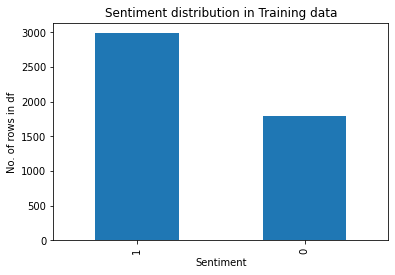

In [ ]:
import matplotlib.pyplot as plt 

print("Number of rows per rating:")
print(df['rating'].value_counts())

# Function to map stars to sentiment
def map_sentiment(stars_received):
    if stars_received >3:
        return "1"
    else:
        return "0"
# Mapping stars to sentiment into three categories
df['sentiment'] = [ map_sentiment(x) for x in df['rating']]
# Plotting the sentiment distribution
plt.figure()
pd.value_counts(df['sentiment']).plot.bar(title="Sentiment distribution in Training data")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

THE CLEANED DATA WAS FURTHER BALANCED FOR THE MODEL BUILDING PHASE AND FOR CREATING THE WORD CLOUD

In [ ]:
df0=pd.read_csv("Redmi Note 11 Balanced.csv")

In [ ]:
dfA=pd.read_csv("/Samsung Galaxy A12.csv Balanced.csv")

In [ ]:
df1= pd.concat([df0,dfA], axis = 0)

In [ ]:
df1.head()

,Unnamed: 0,product,title,rating,body,body1
0,1,"Redmi Note 11 (Horizon Blue, 6GB RAM, 128GB St...",Budget Friendly,1,For 12500/- price it's a good picScreen Amoled...,For price its a good picScreen Amoled Sounds...
1,2,"Redmi Note 11 (Horizon Blue, 6GB RAM, 128GB St...",Good but not great,1,"Pros- Amoled Screen, Battery easily lasts a da...",Pros Amoled Screen Battery easily lasts a day ...
2,3,"Redmi Note 11 (Horizon Blue, 6GB RAM, 128GB St...",Redmi Note 11,1,"Redmi Note 11 is great piece, but automatic ca...",Redmi Note is great piece but automatic call ...
3,4,"Redmi Note 11 (Horizon Blue, 6GB RAM, 128GB St...",Value for money,1,The media could not be loaded.\n ...,The media could not be loaded A good fone in t...
4,5,"Redmi Note 11 (Horizon Blue, 6GB RAM, 128GB St...","Good display and body , worst camera",1,Really good device with great looks and screen...,Really good device with great looks and screen...


In [ ]:
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]

In [ ]:
del df1['product']
del df1['title']
del df1['body']

WORD CLOUD FOR TRAINING DATA

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# visualize the frequent words
all_words = ""
for i in range (df1.shape[0]):
    G=df1.iloc[i]['body1']
    all_words=all_words+str(G)

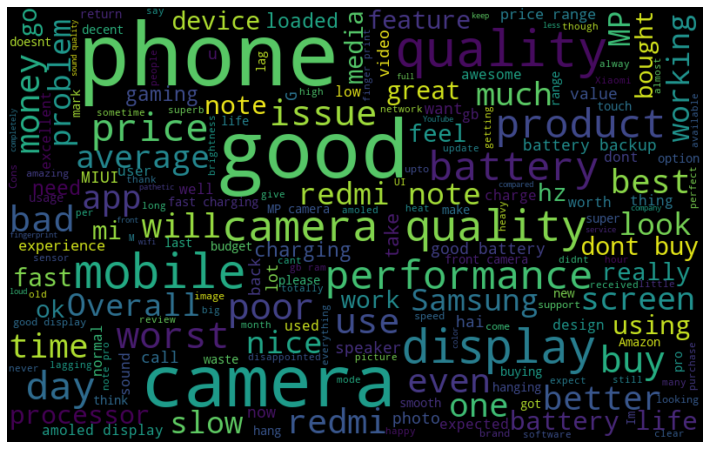

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

GETTING TRAINING AND TESTING DATA

In [ ]:
asd_train=df1['rating'].tolist()

In [ ]:
l=df1['body1'].tolist()

In [ ]:
g = []
for i in l:
    i=str(i)
    h = []
    v = i.split()
    for j in v:
        h.append(j)
    g.append(h)

In [ ]:
trainReviews = g

In [ ]:
asd_train.count(0)

1013

In [ ]:
asd_train.count(1)

1013

Importing the test data

In [ ]:
df3=pd.read_csv("/Samsung Galaxy M32.csv")

In [ ]:
df3.head()

,product,title,rating,body
0,"Samsung Galaxy M32 5G (Sky Blue, 6GB RAM, 128G...",Worst da dai...,1.0,Received damaged product. really disappointed.
1,"Samsung Galaxy M32 5G (Sky Blue, 6GB RAM, 128G...",Backwas phone by samsung more expensive TFT s...,1.0,Backwash phone no good phone cheap pro. Mediat...
2,"Samsung Galaxy M32 5G (Sky Blue, 6GB RAM, 128G...",The best is the 5G phone,5.0,Good 5G phone
3,"Samsung Galaxy M32 5G (Sky Blue, 6GB RAM, 128G...",Feels Premium,5.0,Bought it on the first day of launch. Delivere...
4,"Samsung Galaxy M32 5G (Sky Blue, 6GB RAM, 128G...",Joke.. never buy. 7k features in 20k price. Lol,1.0,I sold the phone sameday somehow on olx in 4k ...


In [ ]:
df3.shape

(3348, 4)

DATA CLEANING OF TEST DATA

In [ ]:
del df3['product']
del df3['title']

In [ ]:
# imports
import re
# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)

In [ ]:
import re
l = []
asd_test = []
pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]'
for i in range(df3.shape[0]):
    
    g = str(df3.iloc[i]['body'])
    g = g.replace('[^\w\s]','')
    g = remove_special_characters(g)
    g = g.replace("/"," ")
    g = g.replace("."," ").replace(","," ").replace("\'","").replace("\"","").replace(":"," ")
    g = " ".join(g.split())
    k = ""
    for j in g:
        if(j == " "):
            k = k + j
        elif(ord(j)>=ord('A') and ord(j)<=ord('Z')):
            k = k + j
        elif(ord(j)>=ord('a') and ord(j)<=ord('z')):
            k = k + j
        elif(ord(j)>=ord('0') and ord(j)<=ord('9')):
            k = k + j
            
    if(len(k)>0):        
        g1 = df3.iloc[i]['rating']
        if(g1<=3):
            asd_test.append(0)
        else:
            asd_test.append(1)
    
        l.append(k)

In [ ]:
g = []
for i in l:
    h = []
    v = i.split()
    for j in v:
        h.append(j)
    g.append(h)

In [ ]:
testReviews = g

In [ ]:
len(trainReviews)

2026

EDA FOR TEST DATA

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 11 Text major ticklabel objects>)

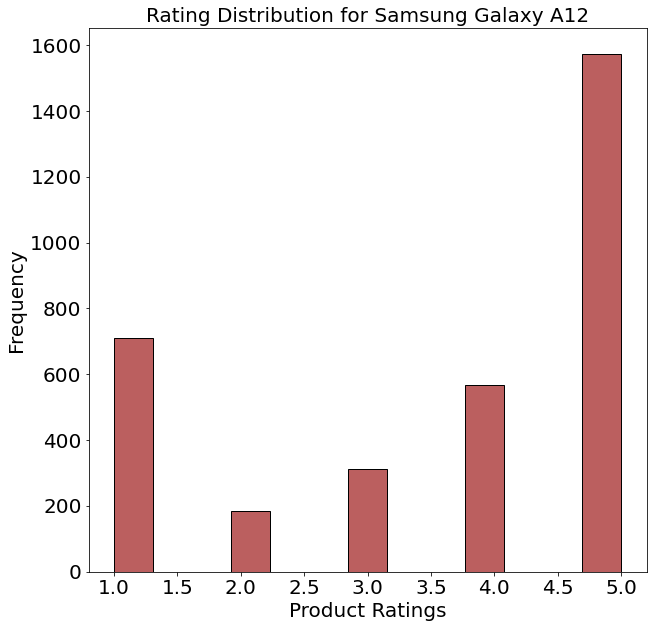

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=df3, x="rating",color="brown")
plt.title("Rating Distribution for Samsung Galaxy A12", fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Product Ratings', fontsize=20)
plt.xticks(fontsize=20)

Word Cloud for the test data reviews

In [ ]:
# visualize the frequent words
all_words = ""
for i in range (df3.shape[0]):
    G=df3.iloc[i]['body']
    all_words=all_words+str(G)

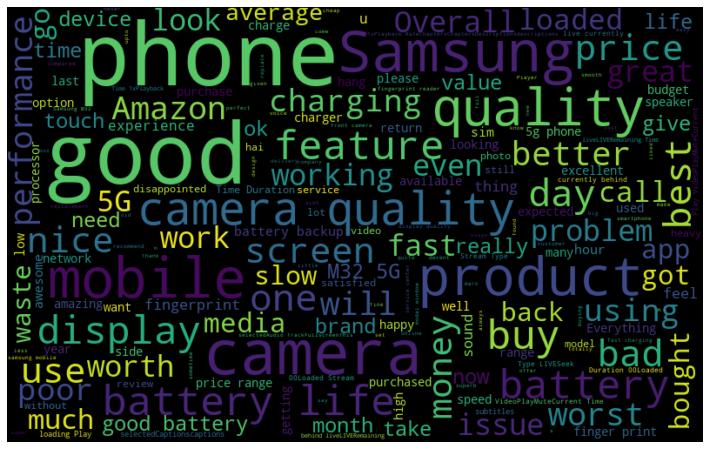

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Building the word2Vec Model

In [ ]:
#learning word embeddings on training data using Gensim library
from gensim.models import Word2Vec, KeyedVectors
import nltk

embeddingsSize=100
model=Word2Vec(trainReviews, window=5, min_count=1, workers=4)

In [ ]:
print(testReviews[2])

['Good', '5G', 'phone']


In [ ]:
import numpy as np
def getVectors(dataset, dfg):
    asd = []
    singleDataItemEmbedding=np.zeros(embeddingsSize)
    vectors=[]
    io = -1
    for dataItem in dataset:
        wordCount=0
        for word in dataItem:
            if word in model.wv:
                singleDataItemEmbedding=singleDataItemEmbedding+model.wv[word]
                wordCount=wordCount+1
        io = io + 1
        if(wordCount == 0):
            continue
        singleDataItemEmbedding=singleDataItemEmbedding/wordCount  
        vectors.append(singleDataItemEmbedding)
        asd.append(dfg[io])
    return vectors, asd

trainReviewVectors, trainLabels=getVectors(trainReviews, asd_train)
testReviewVectors, testLabels=getVectors(testReviews, asd_test)

In [ ]:
len(trainReviewVectors)

2025

In [ ]:
import numpy as np
testLabels = np.array(testLabels)
trainLabels = np.array(trainLabels)

In [ ]:
#Let's define a function that can display the accuracy, F1-score, label-wise precision, recall, etc. of each classifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import f1_score

def printResults(y_true, y_predicted):
    print("Accuracy= ", accuracy_score(y_true, y_predicted))
    precision, recall, fscore, support = score(y_true, y_predicted)

In [ ]:
testLabels

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
len(testLabels)

3296

MODEL BUILDING

In [ ]:
#neural network
from sklearn.neural_network import MLPClassifier

clfMLP = MLPClassifier(hidden_layer_sizes=(10, 10, 10))
clfMLP.fit(trainReviewVectors, trainLabels)
  
testLabelsPredicted=list(clfMLP.predict(testReviewVectors))

#print results
print("####################RESULTS OF NEURAL NETWORK CLASSIFIER##################")

from sklearn import metrics
print(metrics.classification_report(testLabels, testLabelsPredicted))

####################RESULTS OF NEURAL NETWORK CLASSIFIER##################
              precision    recall  f1-score   support

           0       0.46      0.55      0.50      1188
           1       0.72      0.64      0.68      2108

    accuracy                           0.61      3296
   macro avg       0.59      0.60      0.59      3296
weighted avg       0.63      0.61      0.61      3296



In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix1 = confusion_matrix(testLabels, testLabelsPredicted)
print(cf_matrix1)

[[ 657  531]
 [ 760 1348]]


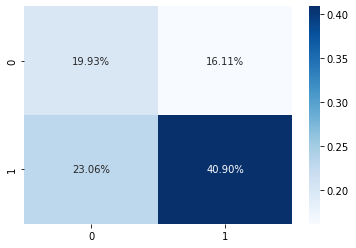

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix1/np.sum(cf_matrix1), annot=True, 
            fmt='.2%', cmap='Blues')


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

clfRF = RandomForestClassifier(n_estimators = 1000)
# Train the model on training data
clfRF.fit(trainReviewVectors, trainLabels);

testLabelsPredicted=list(clfRF.predict(testReviewVectors))

#print results
print("####################RESULTS OF Random Forest CLASSIFIER##################")

from sklearn import metrics
print(metrics.classification_report(testLabels, testLabelsPredicted))

####################RESULTS OF Random Forest CLASSIFIER##################
              precision    recall  f1-score   support

           0       0.52      0.53      0.53      1188
           1       0.73      0.73      0.73      2108

    accuracy                           0.66      3296
   macro avg       0.63      0.63      0.63      3296
weighted avg       0.66      0.66      0.66      3296



In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(trainReviewVectors,trainLabels)


LogisticRegression()

In [ ]:
y_pred = logreg.predict(testReviewVectors)

In [ ]:
print(classification_report(testLabels,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.58      0.51      1188
           1       0.72      0.61      0.66      2108

    accuracy                           0.60      3296
   macro avg       0.59      0.59      0.58      3296
weighted avg       0.62      0.60      0.60      3296



In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(trainReviewVectors, trainLabels)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(testReviewVectors)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, testLabels)*100)
print(classification_report(testLabels,predictions_SVM))

SVM Accuracy Score ->  55.43082524271845
              precision    recall  f1-score   support

           0       0.43      0.75      0.55      1188
           1       0.76      0.44      0.56      2108

    accuracy                           0.55      3296
   macro avg       0.60      0.60      0.55      3296
weighted avg       0.64      0.55      0.56      3296



In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix2 = confusion_matrix(testLabels, predictions_SVM)
print(cf_matrix2)

[[ 895  293]
 [1176  932]]


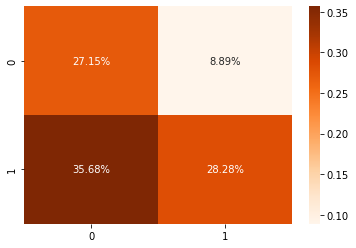

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot=True, 
            fmt='.2%', cmap='Oranges')


In [ ]:
d=predictions_SVM.tolist()
c=["unsatisified customers","satisified customers"]
data=[d.count(0),d.count(1)]

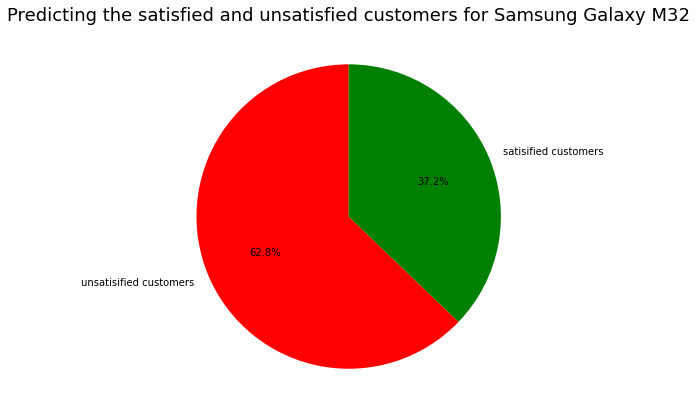

In [ ]:
fig = plt.figure(figsize =(10, 7))
colors = ['red', 'green']
plt.pie(data,labels=c,colors=colors,startangle=90, autopct='%.1f%%')
plt.title("Predicting the satisfied and unsatisfied customers for Samsung Galaxy M32", fontsize = 18) 
plt.show()